Jacqueline Sanchez <br> 
cougarnet ID: Jsanch87 <br> 
COSC 3337 | Summer 24 <br>
Homework 1

<p style="color:green;">
Note: All of the typed answers are writen in green for easy access. Thank you (: 

## About The Data

The data we'll be using comes from [kaggle](https://www.kaggle.com/), and contains the following car attributes:

- car_ID
- symboling
- CarName
- fueltype
- aspiration
- doornumber
- carbody
- drivewheel
- enginelocation
- wheelbase
- carlength
- carwidth
- carheight
- curbweight
- enginetype
- cylindernumber
- enginesize
- fuelsystem
- boreratio
- stroke
- compressionratio
- horsepower
- peakrpm
- citympg
- highwaympg
- price


## Problem Statement
You are required to model the price of cars with the available independent variables. It will be used by your management team to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In general, your company would like for you to answer the followi

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a carng:

## Part 1. Reading and Understanding the Data

Begin by importing some necessary libraries that you'll be using to explore the data.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

Import the data using pandas and save into a variable named cars_df. Then display the first 5 rows.

In [3]:
# Loading the dataset
cars_df = pd.read_csv('car_data.csv')

# Displaying the first 5 rows
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Print some basic statistics of your data.

In [4]:
# Gerneral stats
general_info = cars_df.describe()
general_info.head(n=100)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Print some general information about your data using pandas.

In [5]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

By looking at our previous output, are there any missing values in this dataset? How do we know?

Based on the output of the describe() method, there are no missing values in the dataset as all columns show 205 non-null entries. 

## Part 2. Data Cleaning and Preparation


Instead of using car names, let's extract company names to see how the companies are distributed. Use the CarName column to create a new column in cars_df called 'car_company' that tells us which company the car belongs to. Once you've accomplished this, display all of the unique company names in our dataset.

Hint: Every carName value has the car company name placed in front of it, so you can parse it out. Also lowercase every company name to ensure that we don't double count something like bmw with BMW.

In [6]:
# Extract company names and create a new column
cars_df['car_company'] = cars_df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Display unique company names
print('The The unique companies in our dataset are:')
print(cars_df['car_company'].unique())

The The unique companies in our dataset are:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


Notice how there are some typos in the data. 'toyouta' should be 'toyota', 'porcshce' should be 'porsche', 'maxda' should be 'mazda', 'vokswagen' should be 'volkswagen', and 'vw' should be 'volkswagen'. Use Pandas to make these name corrections and display the unique company names again. 

In [7]:
# Replace misspelled company names
cars_df['car_company'] = cars_df['car_company'].replace({
                        "toyouta" : "toyota", 
                        "porcshce" : "porsche", 
                        "maxda" : "mazda", 
                        "vokswagen" : "volkswagen",
                        "vw" : "volkswagen"})

# Transform company names to lowercase and take the first word
cars_df['car_company'] = cars_df['car_company'].apply(lambda x: x.split(' ')[0].lower())

# Display unique company names
print('The unique companies in our dataset are:')
print(cars_df['car_company'].unique())


The unique companies in our dataset are:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


## Part 3. Visualising Categorical Data

- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel


Create the following plots

1. A plot of the unique company names on the x-axis, and the value counts on the y-axis.
2. A plot of the unique car bodys on the x-axis and value counts on the y-axis.

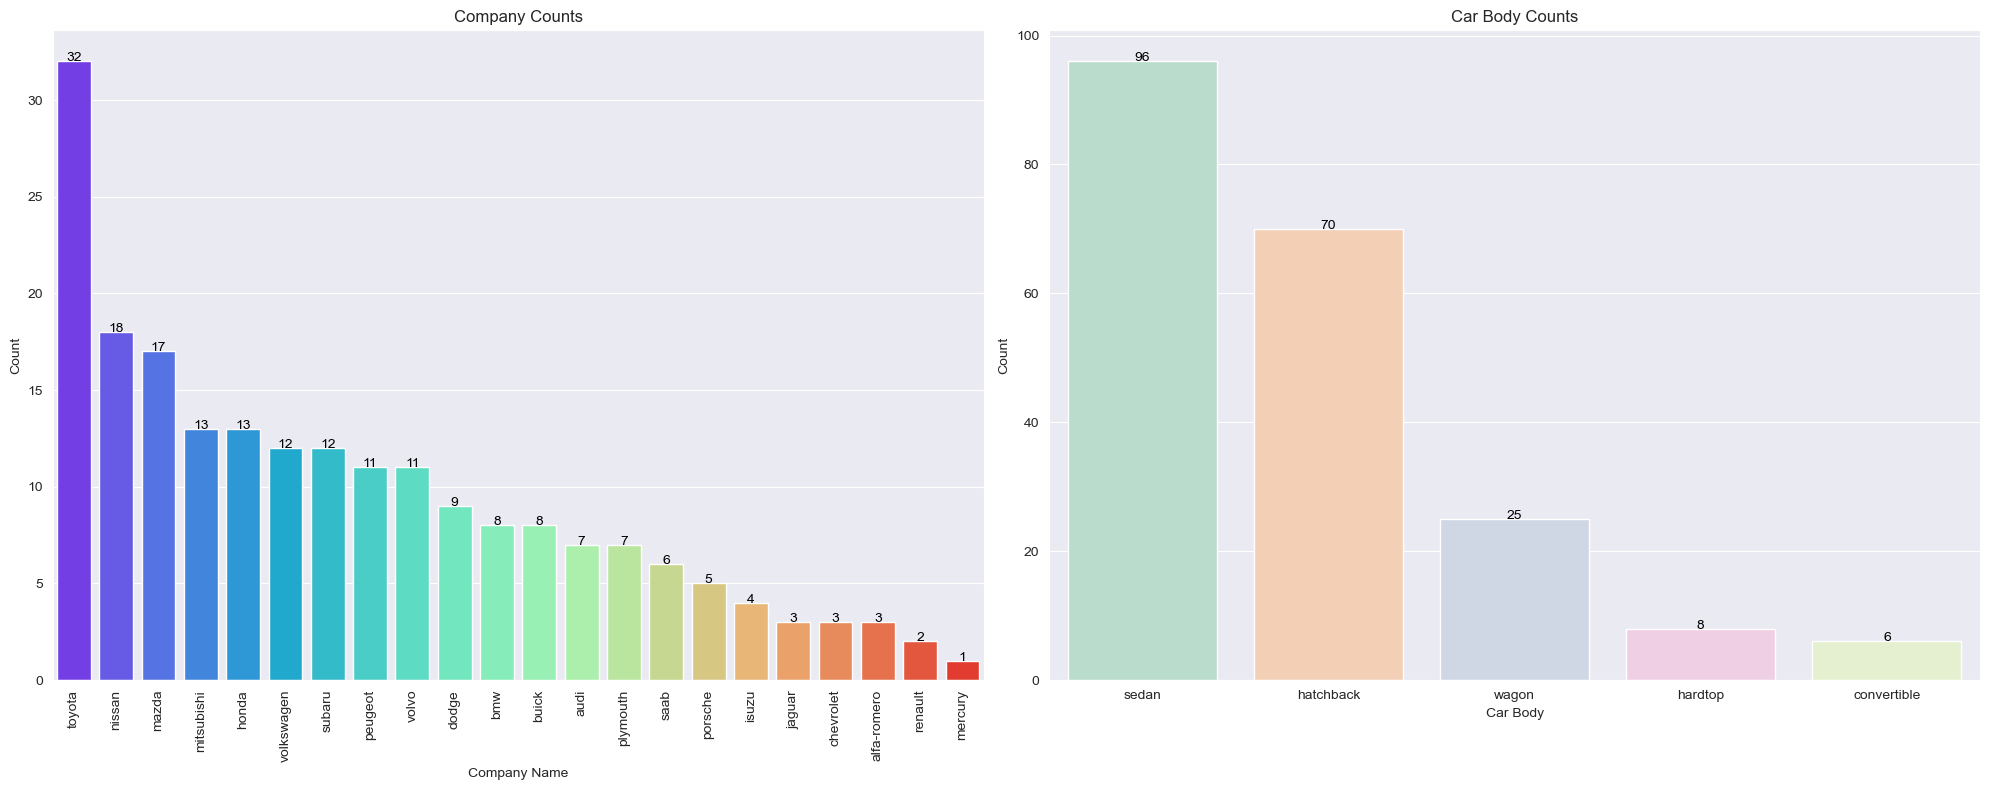

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Company Name vs Count with Rainbow Palette
company_counts = cars_df['car_company'].value_counts().sort_values(ascending=False)
sns.barplot(ax=axes[0], x=company_counts.index, y=company_counts.values, palette='rainbow', hue=company_counts.index, dodge=False, legend=False)

# Adding text labels on each bar
for i, (company, count) in enumerate(company_counts.items()):
    axes[0].text(i, count, str(count), color='black', ha="center")

axes[0].set_xlabel('Company Name')
axes[0].set_ylabel('Count')
axes[0].set_title('Company Counts')
axes[0].tick_params(axis='x', rotation=90)  # for each car company name

# Plot 2: Car Body vs Count with Pastel2 Palette
car_body_counts = cars_df['carbody'].value_counts().sort_values(ascending=False)
sns.barplot(ax=axes[1], x=car_body_counts.index, y=car_body_counts.values, palette='Pastel2', hue=car_body_counts.index, dodge=False, legend=False)

# Adding text labels on each bar
for i, (car_body, count) in enumerate(car_body_counts.items()):
    axes[1].text(i, count, str(count), color='black', ha="center")

axes[1].set_xlabel('Car Body')
axes[1].set_ylabel('Count')
axes[1].set_title('Car Body Counts')
axes[1].tick_params(axis='x', rotation=0)  # for the name for each body type

plt.tight_layout()
plt.show()

After creating these 2 plots, describe what we can conclude from them.

<p style="color:green;">
After creating these 2 plots we can conclude that there is more demand for toyota brand cars than there is for 
mercury cars. For Car Body vs. Average Price hardtop and convertible share about the same price than sedans, wagons, and hatchback.

Create the following plots

1. A plot of the unique company names on the x-axis, and that companies average price on the y-axis.
2. A plot of the unique car bodys on the x-axis and that car body's average price on the y-axis.

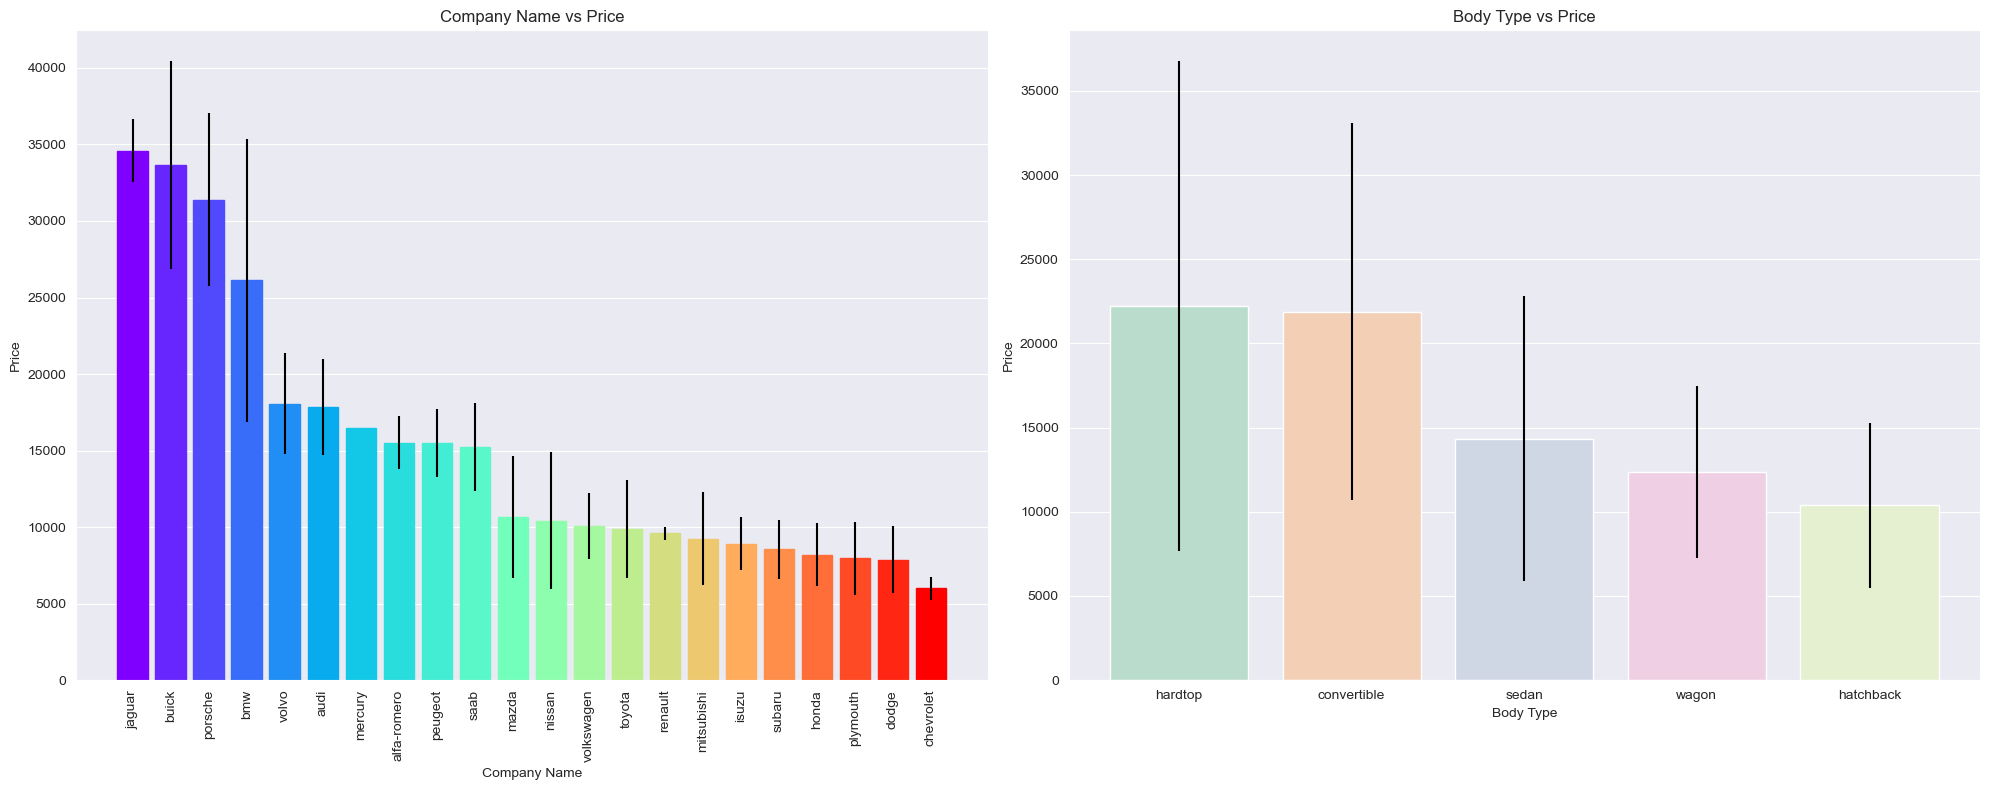

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean price and standard deviation for each company name
company_price_stats = cars_df.groupby('car_company')['price'].agg(['mean', 'std'])
company_price_stats = company_price_stats.sort_values(by='mean', ascending=False)

# Calculate mean price and standard deviation for each car body type
body_price_stats = cars_df.groupby('carbody')['price'].agg(['mean', 'std'])
body_price_stats = body_price_stats.sort_values(by='mean', ascending=False)

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Company Name vs Price with Ombre Rainbow Effect
sns.barplot(ax=axes[0], x=company_price_stats.index, y=company_price_stats['mean'], palette='rainbow', hue=company_price_stats.index, dodge=False, legend=False)
# Generate a colormap
num_bars = len(company_price_stats)
colors = plt.cm.rainbow(np.linspace(0, 1, num_bars))
# Apply the colors to the bars
for bar, color in zip(axes[0].patches, colors):
    bar.set_color(color)
    

# Adding error bars
axes[0].errorbar(company_price_stats.index, company_price_stats['mean'], yerr=company_price_stats['std'], fmt='none', c='black', capsize=0)
axes[0].set_xlabel('Company Name')
axes[0].set_ylabel('Price')
axes[0].set_title('Company Name vs Price')
axes[0].tick_params(axis='x', rotation=90)

# Plot 2: Body Type vs Price with Pastel2 Palette
sns.barplot(ax=axes[1], x=body_price_stats.index, y=body_price_stats['mean'], palette='Pastel2', hue=body_price_stats.index, dodge=False, legend=False)
axes[1].errorbar(body_price_stats.index, body_price_stats['mean'], yerr=body_price_stats['std'], fmt='none', c='black', capsize=0)
axes[1].set_xlabel('Body Type')
axes[1].set_ylabel('Price')
axes[1].set_title('Body Type vs Price')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

After creating these 2 plots, describe what we can conclude from them.

<p style="color:green;">
Buick and BMW have notibly more variability than their counter part competitors like Mercury and Chevrolet. Mercury seem to have no variability. As for body types they all to have a decent amount of variability especially hardtop type.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of the unique symboling values on the x-axis, and the value counts on the y-axis.
2. A box plot of the unique symboling values on the x-axis and price on the y-axis.

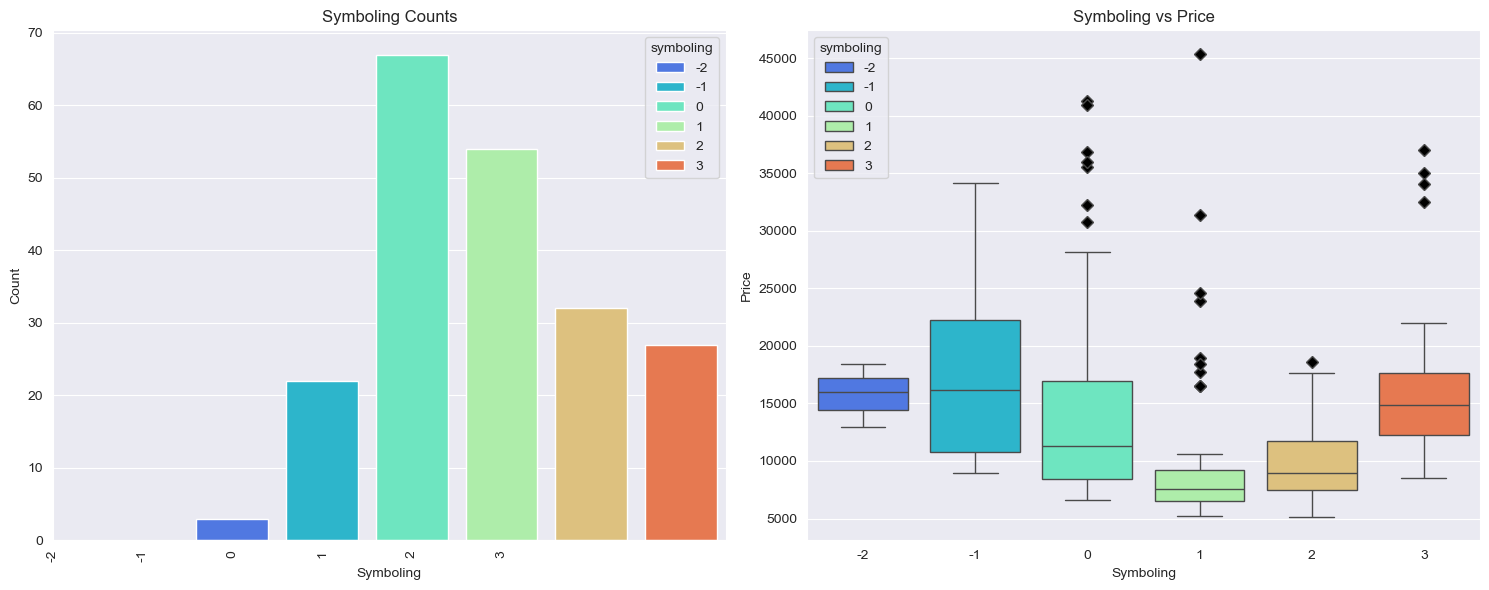

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot with a colorful palette
sorted_symboling = cars_df['symboling'].value_counts().sort_index()
palette = sns.color_palette("rainbow", len(sorted_symboling))
sns.barplot(x=sorted_symboling.index, y=sorted_symboling.values, ax=axes[0], hue=sorted_symboling.index, dodge=False, palette=palette)
axes[0].set_xticks(sorted_symboling.index)  # Set fixed ticks
axes[0].set_xticklabels(sorted_symboling.index, rotation=90)
axes[0].set_xlabel('Symboling')
axes[0].set_ylabel('Count')
axes[0].set_title('Symboling Counts')

# Plot 2: Boxplot with a colorful palette and diamond-shaped outliers
palette = sns.color_palette("rainbow", len(cars_df['symboling'].unique()))
flierprops = dict(marker='D', markerfacecolor='black', markersize=6, linestyle='none')
sns.boxplot(x=cars_df['symboling'], y=cars_df['price'], ax=axes[1], hue=cars_df['symboling'], dodge=False, palette=palette, flierprops=flierprops)
axes[1].set_xlabel('Symboling')
axes[1].set_ylabel('Price')
axes[1].set_title('Symboling vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

After creating these 2 plots, describe what we can conclude from them.

<p style="color:green;">
There more symboling type 0 than there is symboling type -2. For the Symboling vs price plot I can conclude that there are more outliers for Symboling type 0 and type 1. Symboling 1 and 3 seem to have have outliers that are farther away from its upper quartile. 

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of enginetype on the x-axis, and the value counts on the y-axis.
2. A box plot of enginetype on the x-axis and price on the y-axis.

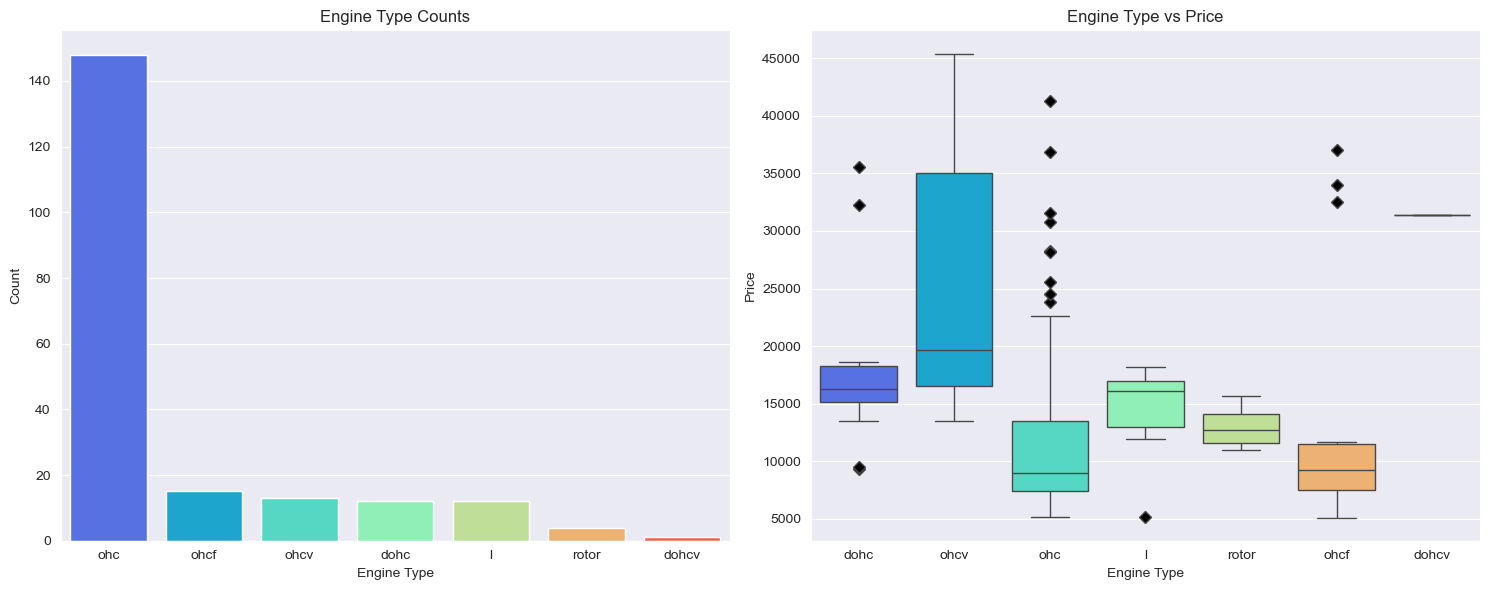

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot with a colorful palette
engine_type_counts = cars_df['enginetype'].value_counts()
palette_bar = sns.color_palette("rainbow", len(engine_type_counts))  # Using a rainbow palette
sns.barplot(x=engine_type_counts.index, y=engine_type_counts.values, ax=axes[0], palette=palette_bar, hue=engine_type_counts.index, dodge=False, legend=False)
axes[0].set_xticks(range(len(engine_type_counts.index)))  # Set fixed ticks
axes[0].set_xticklabels(engine_type_counts.index, rotation=0)
axes[0].set_xlabel('Engine Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Engine Type Counts')

# Plot 2: Boxplot with a colorful palette and diamond-shaped outliers
unique_engine_types = cars_df['enginetype'].unique()  # Get unique engine types without sorting
palette_box = sns.color_palette("rainbow", len(unique_engine_types))  # Using a rainbow palette
flierprops = dict(marker='D', markerfacecolor='black', markersize=6, linestyle='none')
sns.boxplot(x=cars_df['enginetype'], y=cars_df['price'], ax=axes[1], palette=palette_box, flierprops=flierprops, hue=cars_df['enginetype'], dodge=False, legend=False)
axes[1].set_xlabel('Engine Type')
axes[1].set_ylabel('Price')
axes[1].set_title('Engine Type vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

After creating these 2 plots, describe what we can conclude from them.

<p style="color:green;">
There seems to be more chc motors than there are dohcv and rotor. For the Engine Type vs Price, dohc, ohc, I, and chcf seem to have the most outliers than their counterpart. dohcv seem to have less variability than other types of Engine.

Create the following plots
1. A plot of cylindernumber on the x-axis, and the value counts on the y-axis.
2. 
A box plot of cylindernumber on the x-axis and price on the y-axis.is.

/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_14801/4161051004.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engine_type_counts_sorted.index, y=engine_type_counts_sorted.values, ax=axes[0], palette=custom_palette_bar)
/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_14801/4161051004.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_14801/4161051004.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cars_df['cylindernumber'], y=cars_df['price'], orde

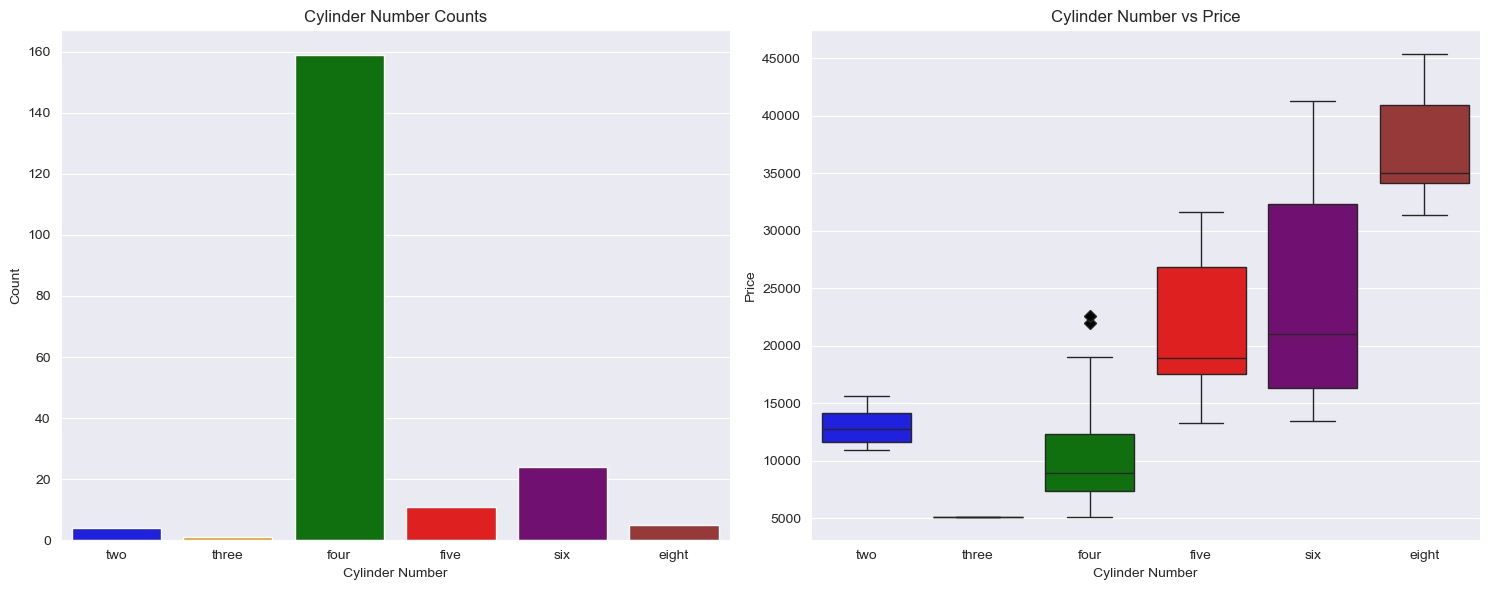

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the mapping of x-axis labels to numerical values
label_mapping = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5, 
    'six': 6, 
    'eight': 8
}

custom_palette_bar = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Sort the labels based on their numerical values
sorted_labels = sorted(label_mapping, key=label_mapping.get)

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot with sorted x-axis values and custom colors
engine_type_counts = cars_df['cylindernumber'].value_counts()
engine_type_counts_sorted = engine_type_counts.reindex(sorted_labels)  # Reindex based on sorted labels
sns.barplot(x=engine_type_counts_sorted.index, y=engine_type_counts_sorted.values, ax=axes[0], palette=custom_palette_bar)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_xlabel('Cylinder Number')
axes[0].set_ylabel('Count')
axes[0].set_title('Cylinder Number Counts')

# Plot 2: Boxplot with custom colors and diamond-shaped outliers

flierprops = dict(marker='D', markerfacecolor='black', markersize=6, linestyle='none')
sns.boxplot(x=cars_df['cylindernumber'], y=cars_df['price'], order=sorted_labels, ax=axes[1], palette=custom_palette_box, flierprops=flierprops)
axes[1].set_xlabel('Cylinder Number')
axes[1].set_ylabel('Price')
axes[1].set_title('Cylinder Number vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them.

<p style="color:green;">
There seem to be more four cylinder car types than there types who only have three, two, and eight. For the Cylinder Number vs Price the only cylinder number that seem to have an outlier is four. 

After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of fuelsystem on the x-axis, and the value counts on the y-axis.
2. A box plot of fuelsystem on the x-axis and price on the y-axis.

/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_14801/1907827576.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuelsystem', data=cars_df, ax=axes[0], palette=custom_palette_bar)
/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_14801/1907827576.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuelsystem', y='price', data=cars_df, ax=axes[1], palette=custom_palette_bar, flierprops=flierprops)


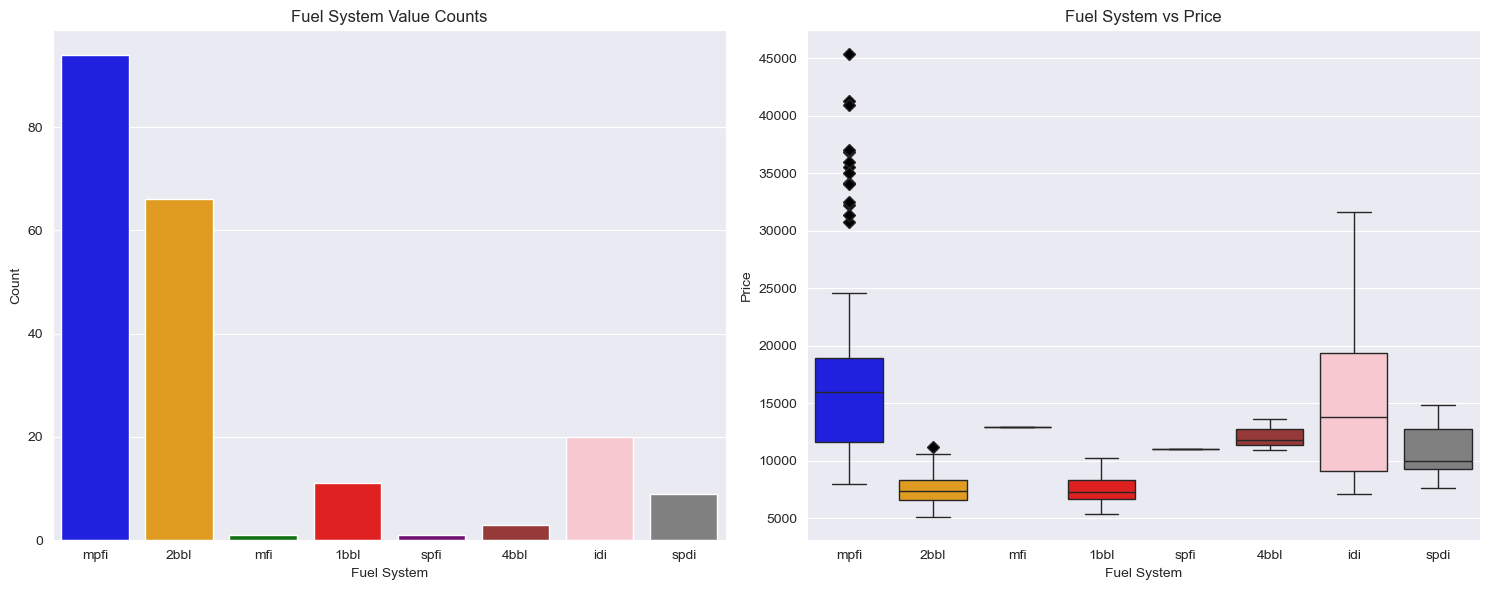

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors for each unique value in fuelsystem
custom_palette_bar = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot of fuelsystem value counts with custom colors
sns.countplot(x='fuelsystem', data=cars_df, ax=axes[0], palette=custom_palette_bar)
axes[0].set_xlabel('Fuel System')
axes[0].set_ylabel('Count')
axes[0].set_title('Fuel System Value Counts')

# Plot 2: Boxplot of fuelsystem vs price with custom colors and diamond-shaped outliers
flierprops = dict(marker='D', markerfacecolor='black', markersize=6, linestyle='none')
sns.boxplot(x='fuelsystem', y='price', data=cars_df, ax=axes[1], palette=custom_palette_bar, flierprops=flierprops)
axes[1].set_xlabel('Fuel System')
axes[1].set_ylabel('Price')
axes[1].set_title('Fuel System vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them.

<p style="color:green;">
There seem to be more cars whose Fuel system is mpfi and 2bbl than there are for mfi, spfi and 4bbl. For the Fuel System vs Price mpfi seem to have the most outliers and following behind is 2bbl. The rest of the fuelsystem seem to have any significant outliers.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of drivewheel on the x-axis, and the value counts on the y-axis.
2. A box plot of drivewheel on the x-axis and price on the y-axis.

/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_14801/189998795.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='drivewheel', data=cars_df, ax=axes[0], palette=palette_bar)
/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_14801/189998795.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='drivewheel', y='price', data=cars_df, ax=axes[1], palette=palette_bar)


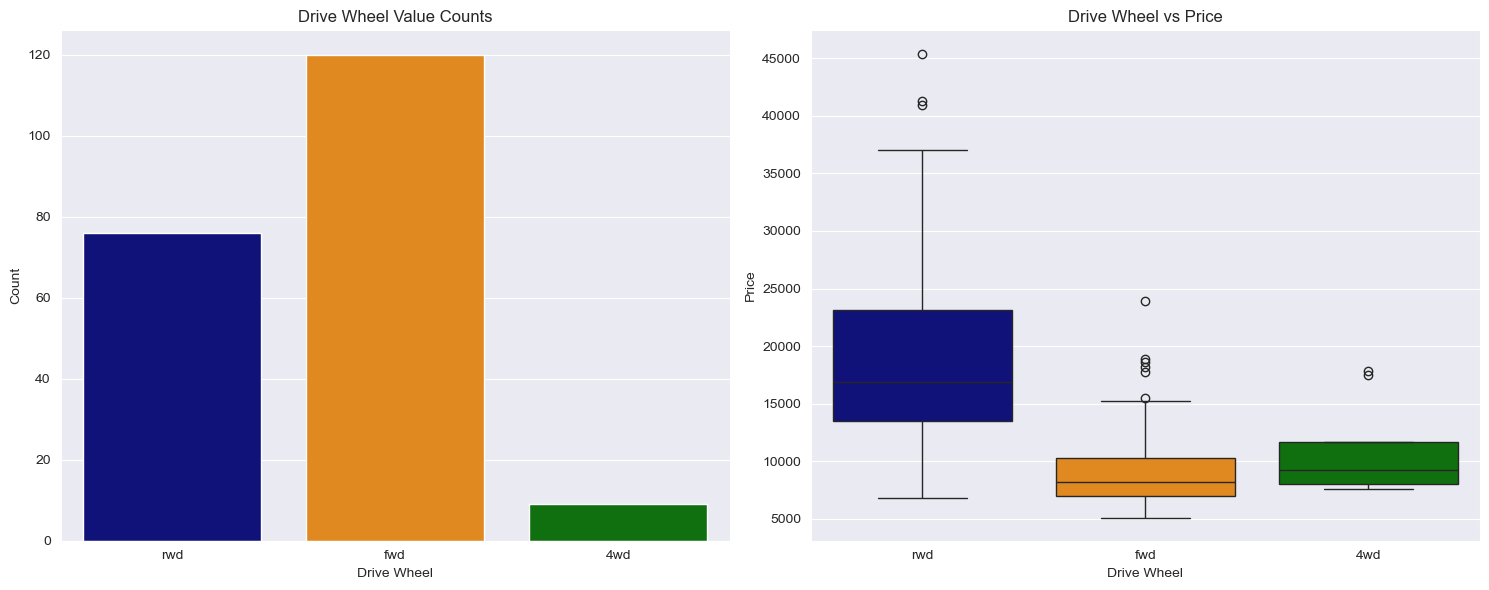

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Define custom palettes for each plot
palette_bar = ['darkblue', 'darkorange', 'green']

# Plot 1: Barplot of drivewheel value counts with specified colors
sns.countplot(x='drivewheel', data=cars_df, ax=axes[0], palette=palette_bar)
axes[0].set_xlabel('Drive Wheel')
axes[0].set_ylabel('Count')
axes[0].set_title('Drive Wheel Value Counts')

# Plot 2: Boxplot of drivewheel vs price with specified colors
sns.boxplot(x='drivewheel', y='price', data=cars_df, ax=axes[1], palette=palette_bar)
axes[1].set_xlabel('Drive Wheel')
axes[1].set_ylabel('Price')
axes[1].set_title('Drive Wheel vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them.

<p style="color:green;">
There seem to be more fwd and rwd than than there are 4wd drive wheel cars. For the Drive Wheel vs Price, all have outliers especially twd. There is significantly less variability in 4wd. 

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of enginelocation on the x-axis, and the value counts on the y-axis.
2. A box plot of enginelocation on the x-axis and price on the y-axis.

/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_13977/1748395041.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='enginelocation', data=cars_df, ax=axes[0], palette=palette_bar)
/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_13977/1748395041.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='enginelocation', y='price', data=cars_df, ax=axes[1], palette=palette_bar)


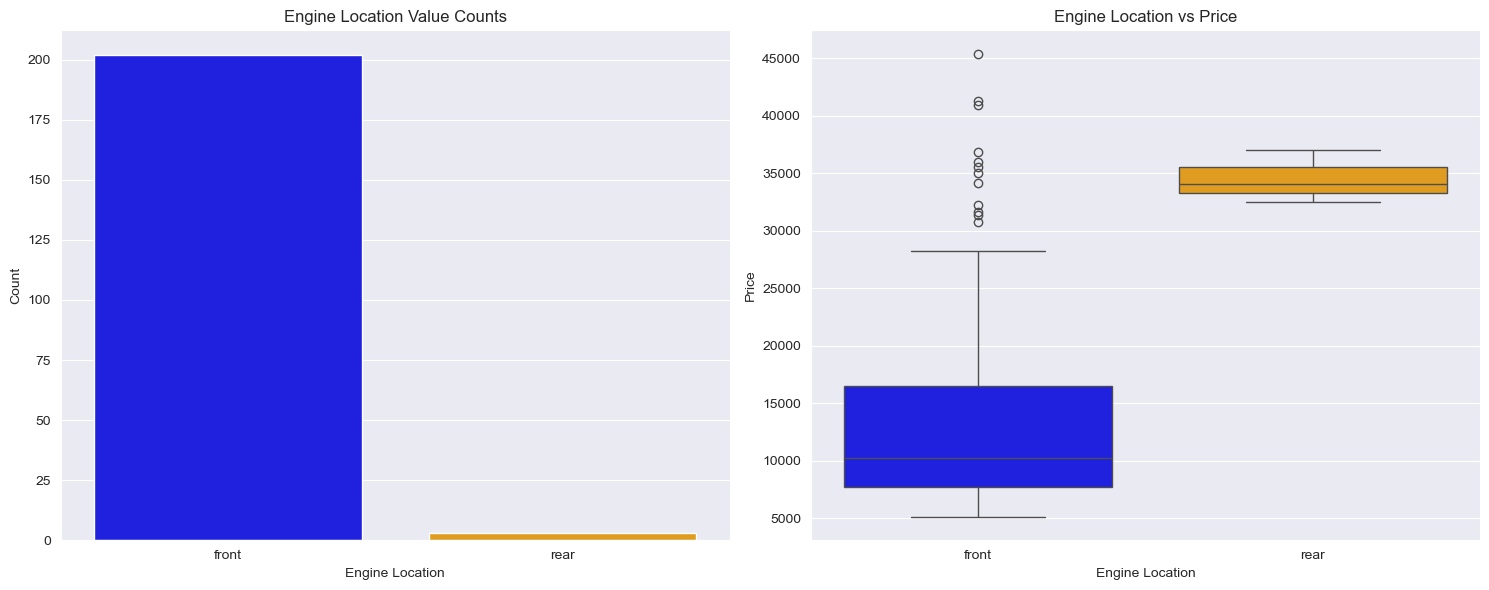

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Define custom palettes for each plot
palette_bar = ['blue', 'orange']


# Plot 1: Barplot of enginelocation value counts with blue color
sns.countplot(x='enginelocation', data=cars_df, ax=axes[0], palette=palette_bar)
axes[0].set_xlabel('Engine Location')
axes[0].set_ylabel('Count')
axes[0].set_title('Engine Location Value Counts')

# Plot 2: Boxplot of enginelocation vs price with orange color
sns.boxplot(x='enginelocation', y='price', data=cars_df, ax=axes[1], palette=palette_bar)
axes[1].set_xlabel('Engine Location')
axes[1].set_ylabel('Price')
axes[1].set_title('Engine Location vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them.

<p style="color:green;">
There seem to be more cars whose engines are located in the front than there are whose engines are located at the rear. For the Engine Location vs Price plot, front engines seem to be significantly more outliers than cars who have engine in the rear. 

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of fueltype on the x-axis, and the value counts on the y-axis.
2. A box plot of fueltype on the x-axis and price on the y-axis.

Create the following plots

1. A plot of fueltype on the x-axis, and the value counts on the y-axis.
2. A box plot of fueltype on the x-axis and price on the y-axis.

/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_13977/1952515876.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fueltype', data=cars_df, ax=axes[0], palette=palette_bar)
/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_13977/1952515876.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fueltype', y='price', data=cars_df, ax=axes[1], palette=palette_bar)


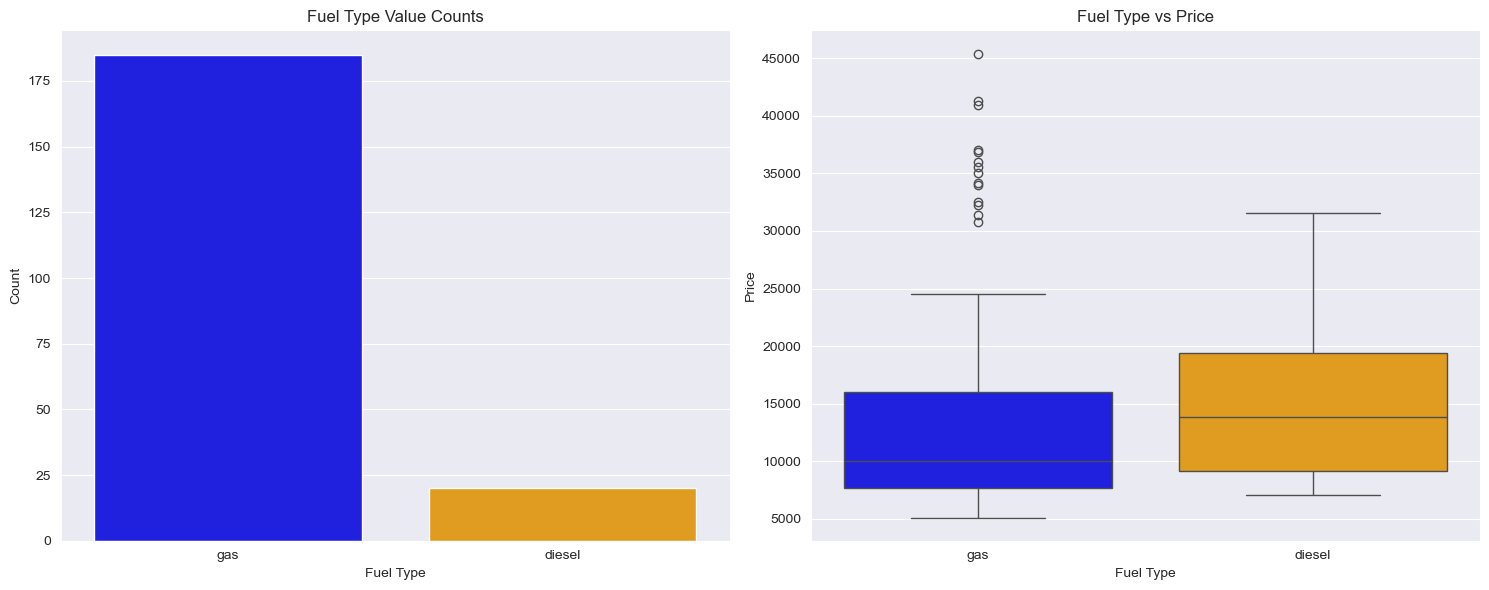

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Define custom palettes for each plot
palette_bar = ['blue', 'orange']  # Adjust the palette according to the number of unique categories in 'fueltype'

# Plot 1: Barplot of fueltype value counts with specified colors
sns.countplot(x='fueltype', data=cars_df, ax=axes[0], palette=palette_bar)
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Fuel Type Value Counts')

# Plot 2: Boxplot of fueltype vs price with specified colors
sns.boxplot(x='fueltype', y='price', data=cars_df, ax=axes[1], palette=palette_bar)
axes[1].set_xlabel('Fuel Type')
axes[1].set_ylabel('Price')
axes[1].set_title('Fuel Type vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them.

<p style="color:green;">
There seem to be more cars whose fuel type is gas than there are those whose fuel type is diesel. Fo the Fuel Type vs Price gas car type seem to have the most outliers than diessel fuel type cars. 

### Create the following plots

1. A plot of doornumber on the x-axis, and the value counts on the y-axis.
2. A box plot of doornumber on the x-axis and price on the y-axis.

/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_13977/230062109.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='doornumber', data=cars_df, ax=axes[0], palette=palette_bar)
/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_13977/230062109.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='doornumber', y='price', data=cars_df, ax=axes[1], palette=palette_bar)


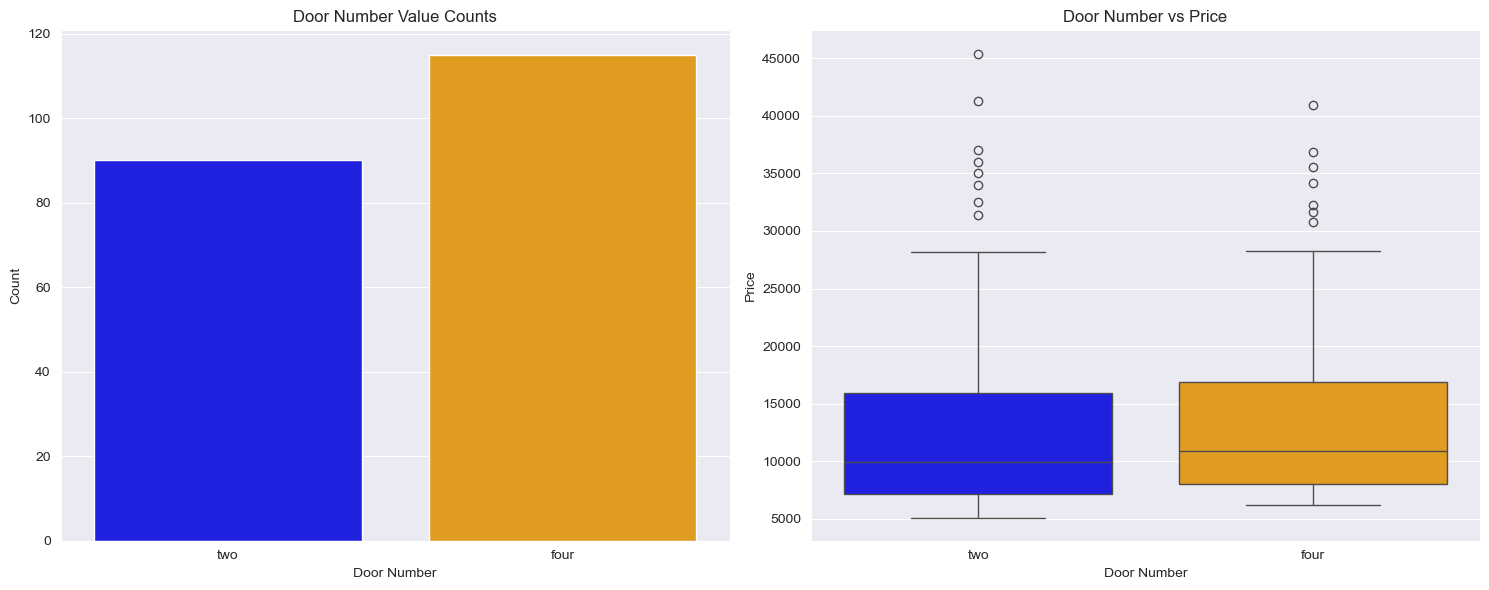

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values for doornumber
unique_doornumbers = cars_df['doornumber'].unique()

# Create the color palettes
palette_bar = ['blue', 'orange']  # Adjust the palette according to the number of unique categories in 'doornumber'


# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot of doornumber value counts with specified colors
sns.countplot(x='doornumber', data=cars_df, ax=axes[0], palette=palette_bar)
axes[0].set_xlabel('Door Number')
axes[0].set_ylabel('Count')
axes[0].set_title('Door Number Value Counts')

# Plot 2: Boxplot of doornumber vs price with specified colors
sns.boxplot(x='doornumber', y='price', data=cars_df, ax=axes[1], palette=palette_bar)
axes[1].set_xlabel('Door Number')
axes[1].set_ylabel('Price')
axes[1].set_title('Door Number vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them. <br>
Type your answer here:

<p style="color:green;">
There is not a significant diffenerence between two and four door car count. For the Door Number vs Price plot both two and four door seem to also share the same fair amount of outliers.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of aspiration on the x-axis, and the value counts on the y-axis.
2. A box plot of aspiration on the x-axis and price on the y-axis.

/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_14801/405042271.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='aspiration', data=cars_df, ax=axes[0], palette=palette_bar)
/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_14801/405042271.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='aspiration', y='price', data=cars_df, ax=axes[1], palette=palette_bar)


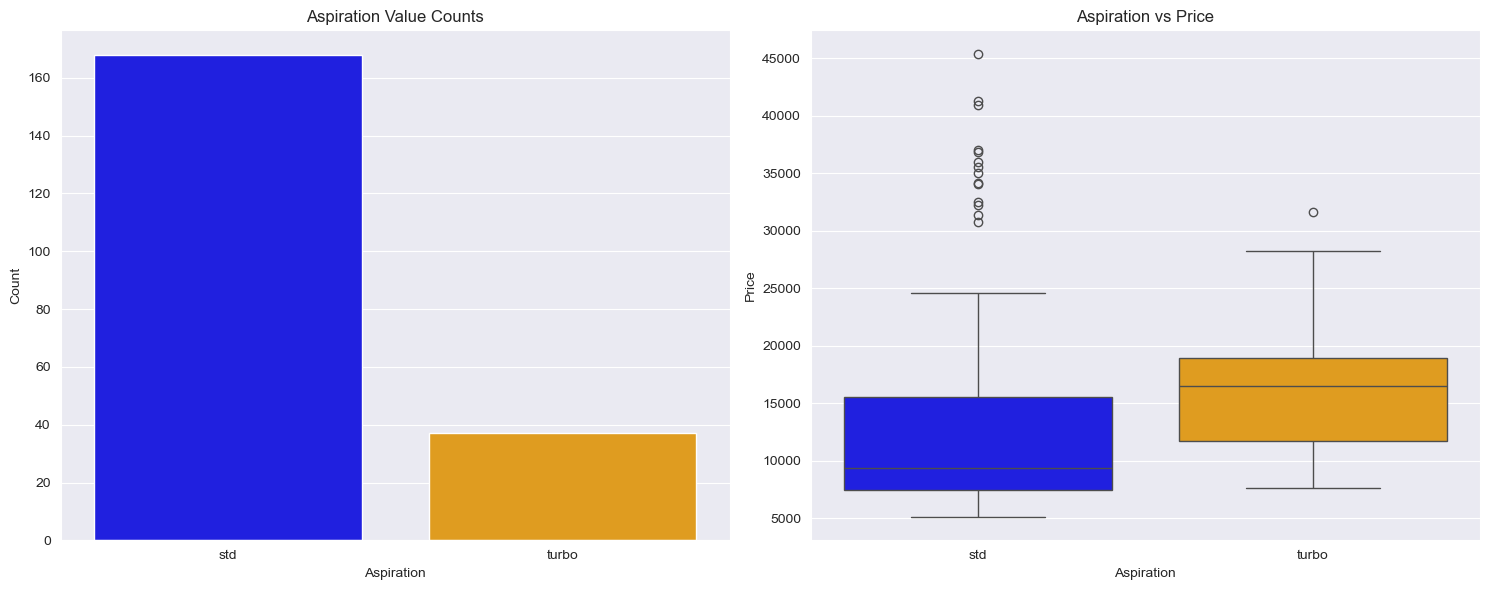

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values for aspiration
unique_aspirations = cars_df['aspiration'].unique()

# Create the color palettes
palette_bar = ['blue', 'orange']  # Adjust the palette according to the number of unique categories in 'aspiration'


# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Barplot of aspiration value counts with specified colors
sns.countplot(x='aspiration', data=cars_df, ax=axes[0], palette=palette_bar)
axes[0].set_xlabel('Aspiration')
axes[0].set_ylabel('Count')
axes[0].set_title('Aspiration Value Counts')

# Plot 2: Boxplot of aspiration vs price with specified colors
sns.boxplot(x='aspiration', y='price', data=cars_df, ax=axes[1], palette=palette_bar)
axes[1].set_xlabel('Aspiration')
axes[1].set_ylabel('Price')
axes[1].set_title('Aspiration vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them.

<p style="color:green;">
There are more std Aspiration cars than there are those who are turbo. For the Aspiration vs Price plot, std has the most outliers than turbo.

### WRITE YOUR ANSWER HERE

## Part 4. Visualising Numerical Data

price
carlength
carwidth
carheight
curbweight
enginesize
boreratio
stroke
compressionratio
horsepower
peakrpm
wheelbase
citympg
highwaympg

Create the following plots

1. A plot showing the price distribution
2. A box plot of price

/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_14801/1100826082.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df['price'], ax=axes[0], kde=True)


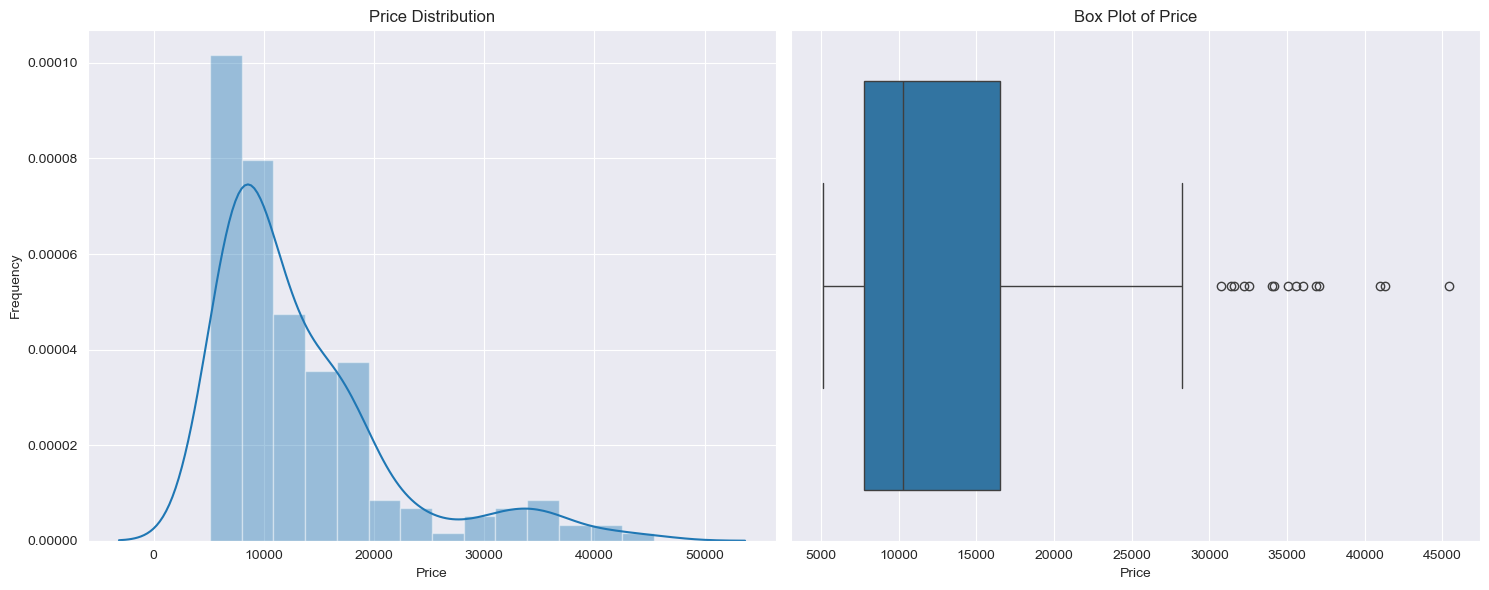

In [20]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Price distribution using distplot
sns.distplot(cars_df['price'], ax=axes[0], kde=True)
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')

# Plot 2: Box plot of price
sns.boxplot(x='price', data=cars_df, ax=axes[1])
axes[1].set_xlabel('Price')
axes[1].set_title('Box Plot of Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 2 plots, describe what we can conclude from them.

<p style="color:green;">
The price distribution histogram is right skewed. Its mean seem to be centered around 10,000 and the histogram seem to be depict low variability meaning that it has less variability as to that also the standard deviation is also low. For the boxplot the there seem to be more outliers whose price is higher and furter pricier than within the range of prices.

### WRITE YOUR ANSWER HERE

Let's try and get an idea of how the car attributes related to a car's size are related to price.

Create the following plots

1. A scatter plot of carlength vs price.
2. A scatter plot of carwidth vs price.
3. A scatter plot of carheight vs price.
4. A scatter plot of carweight vs price.
 ce.rice.

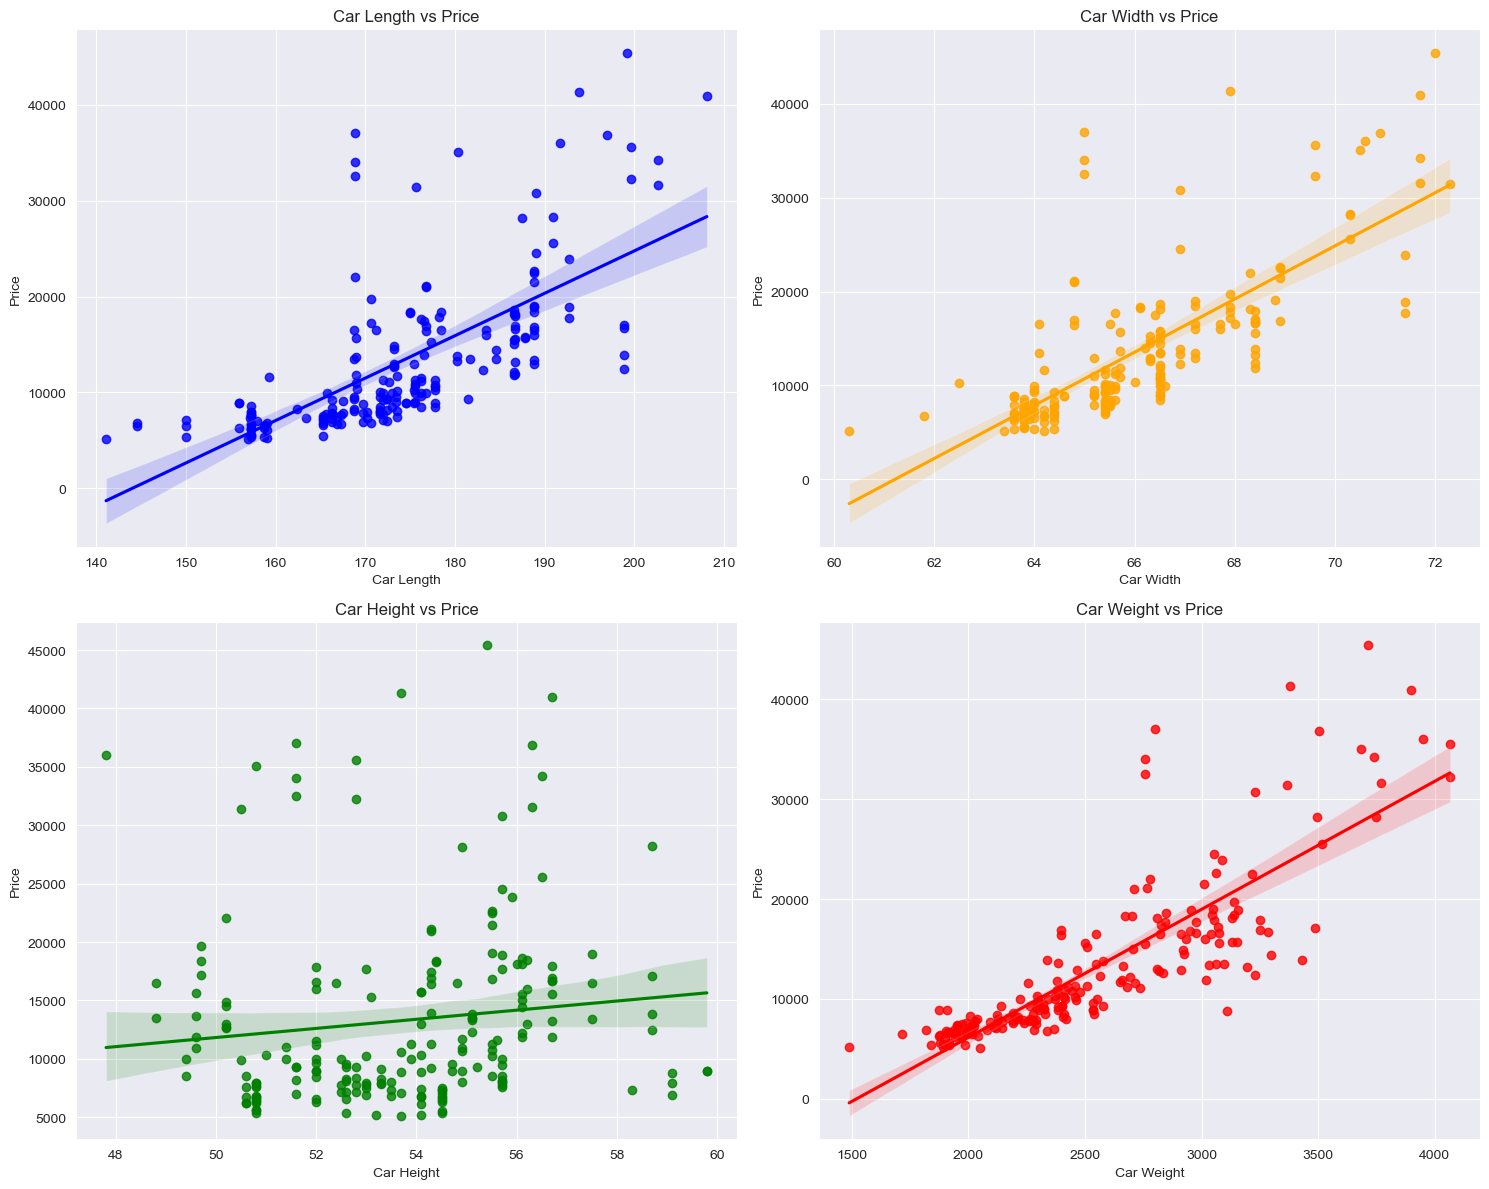

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `cars_df` is your DataFrame containing the relevant data

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Scatter plot of carlength vs price with regression line
sns.regplot(x='carlength', y='price', data=cars_df, ax=axes[0, 0], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axes[0, 0].set_xlabel('Car Length')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Car Length vs Price')

# Plot 2: Scatter plot of carwidth vs price with regression line
sns.regplot(x='carwidth', y='price', data=cars_df, ax=axes[0, 1], scatter_kws={'color': 'orange'}, line_kws={'color': 'orange'})
axes[0, 1].set_xlabel('Car Width')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_title('Car Width vs Price')

# Plot 3: Scatter plot of carheight vs price with regression line
sns.regplot(x='carheight', y='price', data=cars_df, ax=axes[1, 0], scatter_kws={'color': 'green'}, line_kws={'color': 'green'})
axes[1, 0].set_xlabel('Car Height')
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_title('Car Height vs Price')

# Plot 4: Scatter plot of carweight vs price with regression line
sns.regplot(x='curbweight', y='price', data=cars_df, ax=axes[1, 1], scatter_kws={'color': 'red'}, line_kws={'color': 'red'})
axes[1, 1].set_xlabel('Car Weight')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_title('Car Weight vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating these 4 plots, describe what we can conclude from them.

<p style="color:green;">
All of the graphs seem to depict a lot of variation whose correlation are not as strong corralated to their corresponding regression line. Car weight and car width seem to have a decent outcome as for the car weight vs price seem to have more datapoints that seem to form a linear regression line which indicates that price and car weight have some strong correlation. 

### WRITE YOUR ANSWER HERE

Create scatter plots of the remaining numerical variables to see their relationship with price.

Create the following plots

1. A scatter plot of enginesize vs price.
2. A scatter plot of boreratio vs price.
3. A scatter plot of stroke vs price.
4. A scatter plot of compressionratio vs price.
5. A scatter plot of horsepower vs price.
6. A scatter plot of peakrpm vs price.
7. A scatter plot of wheelbase vs price.
8. A scatter plot of citympg vs price.
9. A scatter plot of highwaympg vs price.
pg vs price.

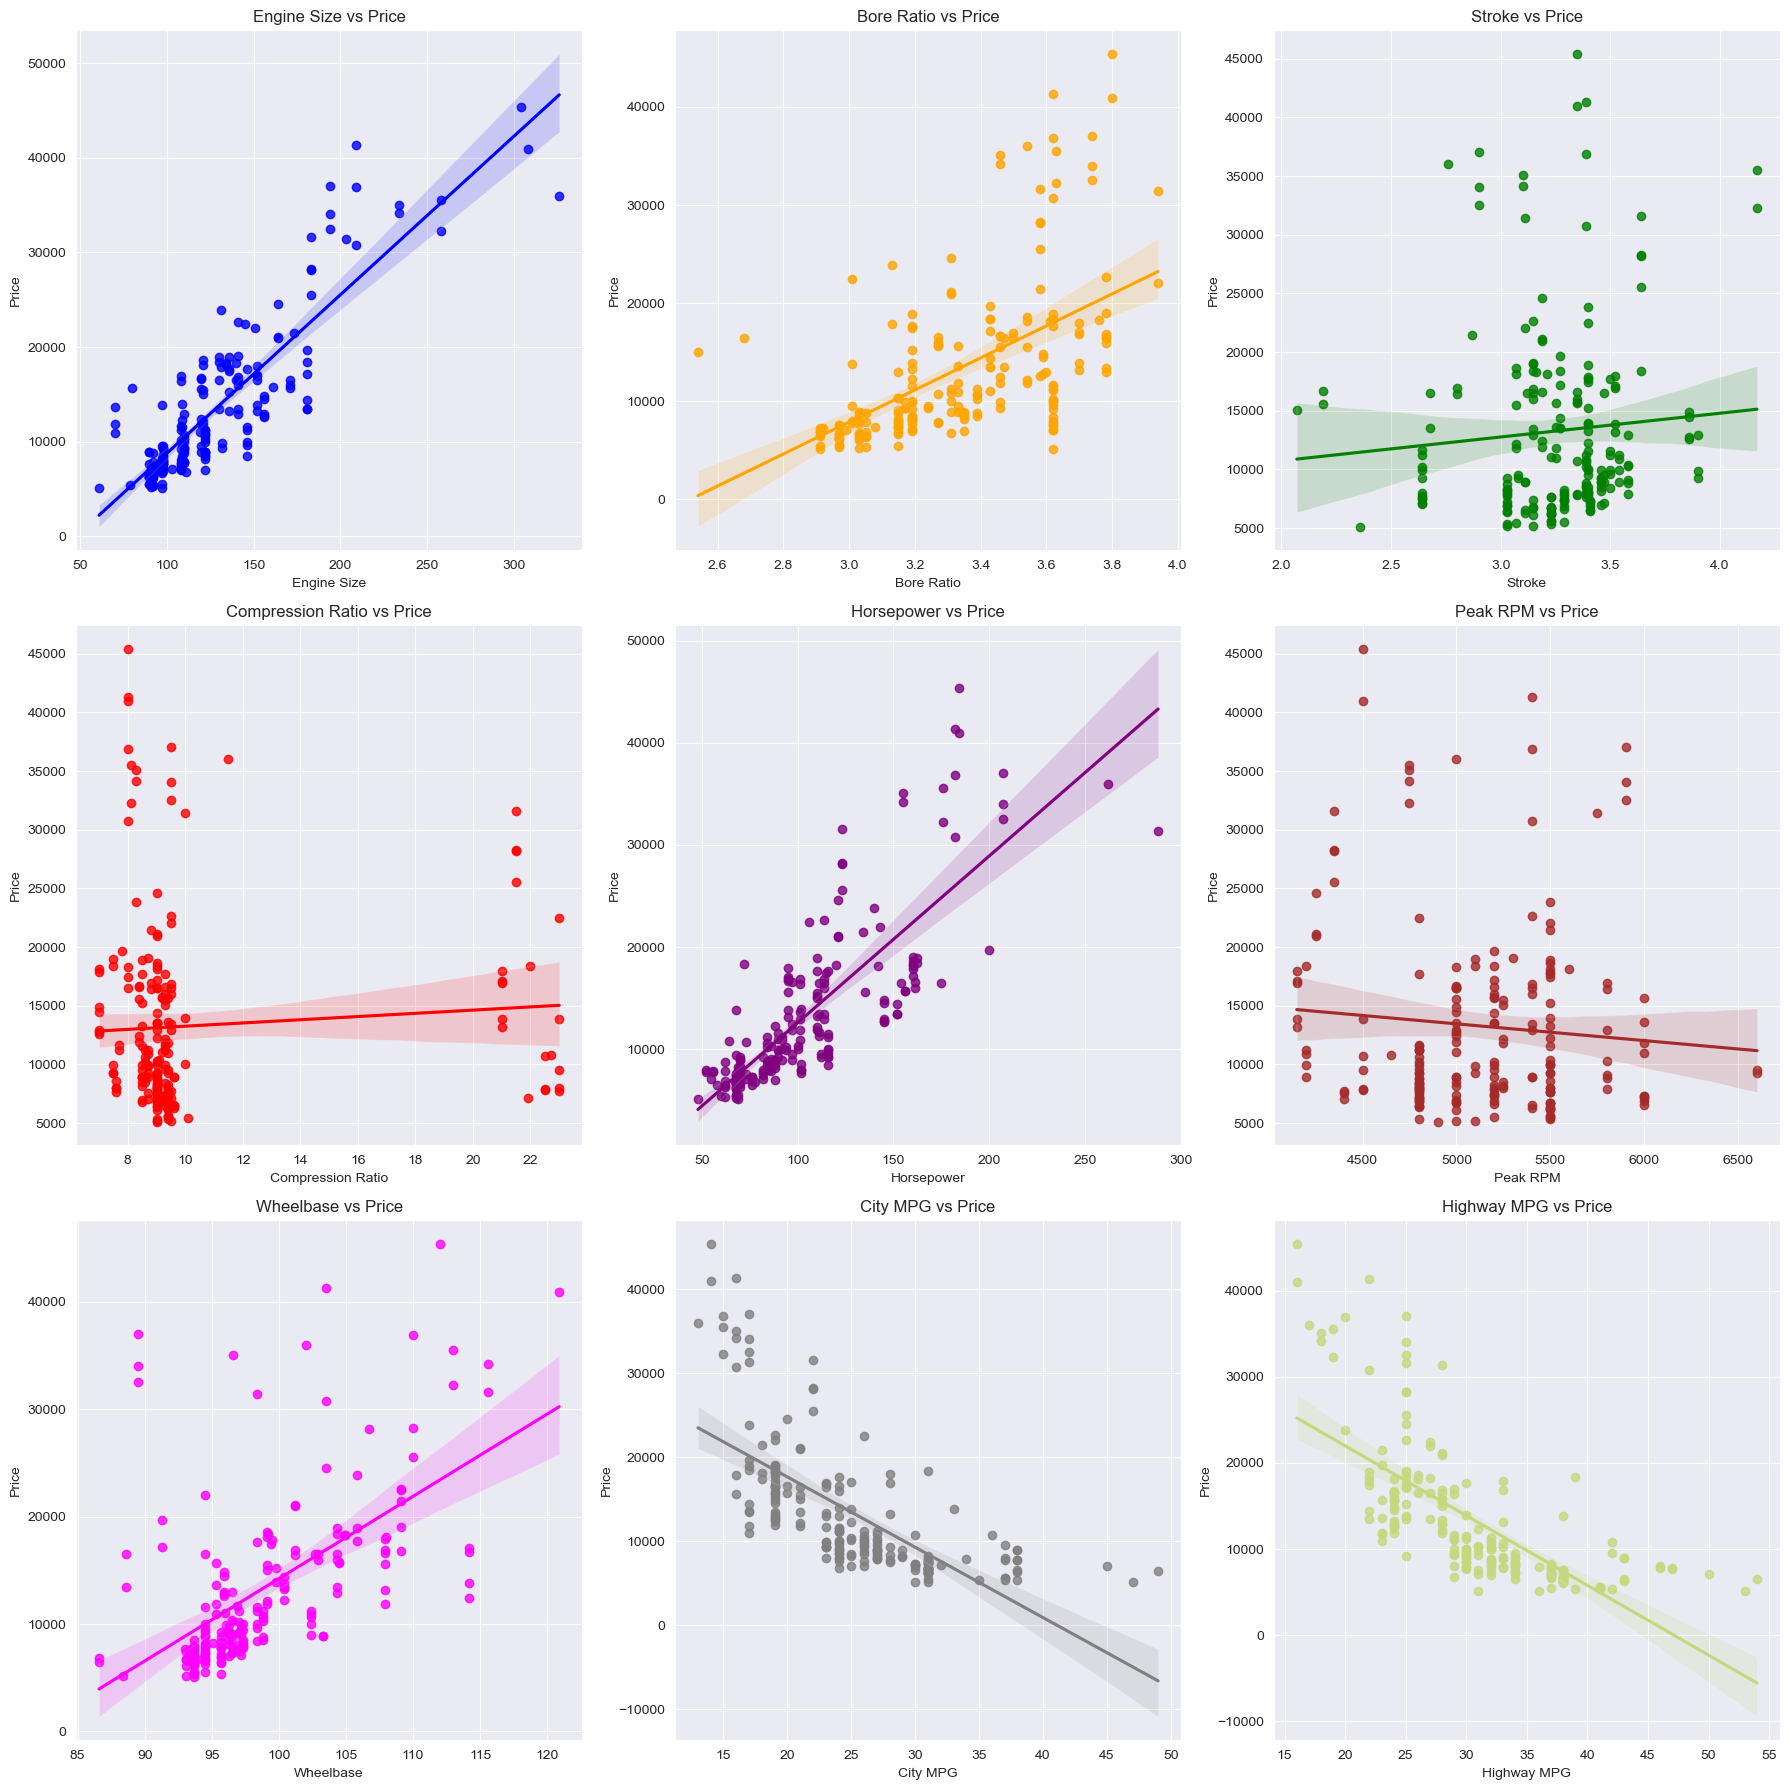

In [99]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `cars_df` is your DataFrame containing the relevant data

# Set up the figure and axes (3 rows and 2 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Plot 1: Scatter plot of enginesize vs price with regression line
sns.regplot(x='enginesize', y='price', data=cars_df, ax=axes[0, 0], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axes[0, 0].set_xlabel('Engine Size')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Engine Size vs Price')

# Plot 2: Scatter plot of boreratio vs price with regression line
sns.regplot(x='boreratio', y='price', data=cars_df, ax=axes[0, 1], scatter_kws={'color': 'orange'}, line_kws={'color': 'orange'})
axes[0, 1].set_xlabel('Bore Ratio')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_title('Bore Ratio vs Price')

# Plot 3: Scatter plot of stroke vs price with regression line
sns.regplot(x='stroke', y='price', data=cars_df, ax=axes[0, 2], scatter_kws={'color': 'green'}, line_kws={'color': 'green'})
axes[0, 2].set_xlabel('Stroke')
axes[0, 2].set_ylabel('Price')
axes[0, 2].set_title('Stroke vs Price')

# Plot 4: Scatter plot of compressionratio vs price with regression line
sns.regplot(x='compressionratio', y='price', data=cars_df, ax=axes[1, 0], scatter_kws={'color': 'red'}, line_kws={'color': 'red'})
axes[1, 0].set_xlabel('Compression Ratio')
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_title('Compression Ratio vs Price')

# Plot 5: Scatter plot of horsepower vs price with regression line
sns.regplot(x='horsepower', y='price', data=cars_df, ax=axes[1, 1], scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})
axes[1, 1].set_xlabel('Horsepower')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_title('Horsepower vs Price')

# Plot 6: Scatter plot of peakrpm vs price with regression line
sns.regplot(x='peakrpm', y='price', data=cars_df, ax=axes[1, 2], scatter_kws={'color': 'brown'}, line_kws={'color': 'brown'})
axes[1, 2].set_xlabel('Peak RPM')
axes[1, 2].set_ylabel('Price')
axes[1, 2].set_title('Peak RPM vs Price')

# Plot 7: Scatter plot of wheelbase vs price with regression line
sns.regplot(x='wheelbase', y='price', data=cars_df, ax=axes[2, 0], scatter_kws={'color': 'magenta'}, line_kws={'color': 'magenta'})
axes[2, 0].set_xlabel('Wheelbase')
axes[2, 0].set_ylabel('Price')
axes[2, 0].set_title('Wheelbase vs Price')

# Plot 8: Scatter plot of citympg vs price with regression line
sns.regplot(x='citympg', y='price', data=cars_df, ax=axes[2, 1], scatter_kws={'color': 'grey'}, line_kws={'color': 'grey'})
axes[2, 1].set_xlabel('City MPG')
axes[2, 1].set_ylabel('Price')
axes[2, 1].set_title('City MPG vs Price')

# Plot 9: Scatter plot of highwaympg vs price with regression line
sns.regplot(x='highwaympg', y='price', data=cars_df, ax=axes[2, 2], scatter_kws={'color': '#C7D77E'}, line_kws={'color': '#C7D77E'})
axes[2, 2].set_xlabel('Highway MPG')
axes[2, 2].set_ylabel('Price')
axes[2, 2].set_title('Highway MPG vs Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


After creating the plots above, describe what we can conclude from them.

<p style="color:green;">
The plots above all seem to have a poor correlation with the two features represented in each plot. This indicates that the features do not have a strong significance with each other especially seen in Stroke vs price and Peak vs price. If would want to train a model based on these features with the target value being price. Than it would be convinient to remove Stroke and peak from the other features as this could potentially help improve the models performance since we have removed data that is less relevant to the observation (have poor correlation to the price target value)  

### WRITE YOUR ANSWER HERE

Create a heatmap or correlation matrix to inspect the correlations in our dataset.

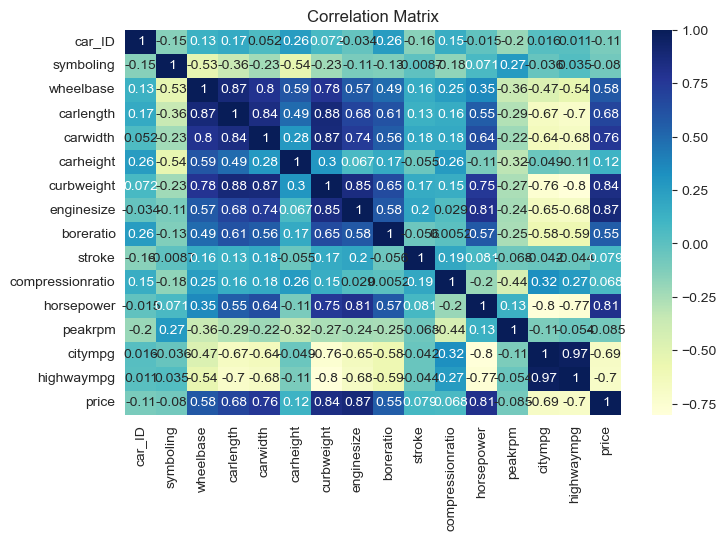

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `cars_df` is your DataFrame containing the relevant data

# Remove non-numeric columns from the DataFrame
numeric_cars_df = cars_df.select_dtypes(include=['float64', 'int64'])

# Create the heatmap of the correlation matrix
sns.heatmap(numeric_cars_df.corr(), annot=True, cmap ='YlGnBu')

# Set the title of the plot
plt.title("Correlation Matrix")

plt.show()


After creating the plot above, what can you conclude? Are there any features you can combine to form a new one? If so, try it out and see how it affects your final results in the end.

<p style="color:green;">
The values that run along the diagonal of the heat matrix are the correlation between the observation and itself. The rest are observations and their correlation value with one another. The darker the hue of a cell is to be exact the value whose much nearer to being a 1 indicate that the two elements have a strong correlation with one another. For the most part most of the observation seem to have strong correlation with one another with a few exceptions. I noticed that values that are higher meaning that they have a strong correlation are near and along the diagonal.

### WRITE YOUR ANSWER HERE

For example, citympg and highwaympg can be combined into a single feature. Create a new column called 'fuel_economy' that's a combination of the 2.

In [103]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
# Assuming `cars_df` is your DataFrame containing the relevant data

# Create the new column 'fuel_economy' by averaging 'citympg' and 'highwaympg'
cars_df['fuel_economy'] = (cars_df['citympg'] + cars_df['highwaympg']) / 2

# Display the first few rows of the DataFrame to verify the new column
cars_df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,fuel_economy
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,24.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,24.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,22.5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,27.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,20.0


After visual analysis, which variables do you believe to be significant when predicting price, and why?

### WRITE YOUR ANSWER HERE

## Part 5. Data Pre-Processing

Perform the following

1. Convert your categorical variables into dummy variables
2. Scale the data using a scaler of your choice
3. Split your data into a training and testing set, with test size of 0.30


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Assuming cars_df is your DataFrame containing the relevant data

# 1. Convert Categorical Variables into Dummy Variables
categorical_columns = cars_df.select_dtypes(include=['object']).columns.tolist()
df_dummies = pd.get_dummies(cars_df, columns=categorical_columns, drop_first=True)

# Define the features (X) and the target variable (y)
X = df_dummies.drop(columns=['price'])  # Features (independent variables)
y = df_dummies['price']  # Target variable (dependent variable)

# 2. Scale the Data
scaler = StandardScaler()  # You can choose any scaler: StandardScaler, MinMaxScaler, RobustScaler
X_scaled = scaler.fit_transform(X)

# 3. Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

# 4. Fit an OLS Model

# Add a constant to the model (intercept)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_const).fit()

# Make predictions on the test set
y_pred_ols = ols_model.predict(X_test_const)

# Print the summary of the model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     13.33
Date:                Sun, 09 Jun 2024   Prob (F-statistic):             0.0103
Time:                        21:02:23   Log-Likelihood:                -1046.1
No. Observations:                 143   AIC:                             2370.
Df Residuals:                       4   BIC:                             2782.
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.656e+04   1.35e+04      1.227      0.2

## Part 6. Model Creation and Evaluation

Perform the following using sklearn

1. Create a linear regression model, and train (fit) it on the training data.
2. Run the test data through your model to obtain predictions. Save these predictions into a variable called 'predictions'.
3. Create a scatter plot of the true price labels vs the predicted price value of your model.
4. Create a histogram of the residuals
5. Print the \( R^2 \) of your model
values.

Note: You don't need to obtain the same results as us. If you made any changes earlier and obtain better results, then even better. Just make sure you're not scoring significantly lower than our obtained values.

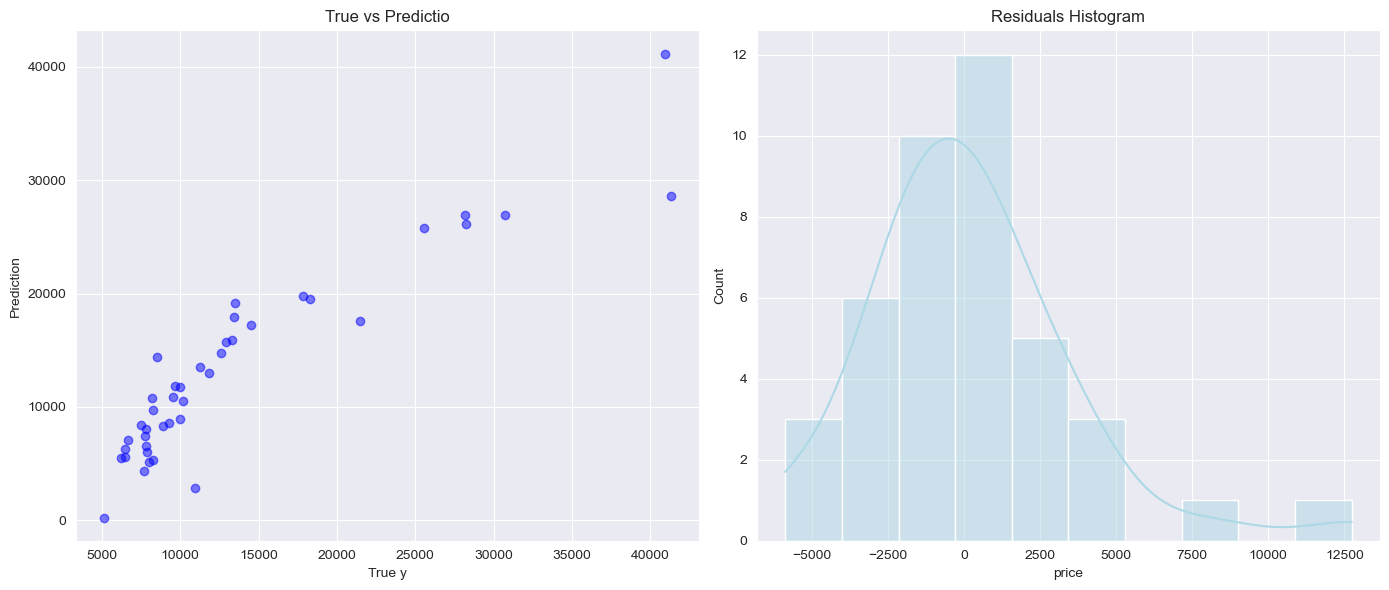

R-Squared: 0.8544215849172805


In [73]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Convert categorical variables into dummy variables
categorical_columns = cars_df.select_dtypes(include=['object']).columns.tolist()
dummy_df = pd.get_dummies(cars_df, columns=categorical_columns, drop_first=True)

# Step 2: Prepare the data
X = dummy_df.drop(['price', 'car_ID','boreratio', 'carheight'], axis=1)  # Features (independent variables)
y = dummy_df['price']  # Target variable

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale the features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Fit the OLS model on the training data
X_train_scaled = sm.add_constant(X_train_scaled, has_constant='add')  # Add a constant term to the features
ols_model = sm.OLS(y_train, X_train_scaled)
ols_results = ols_model.fit()

# Step 6: Predict on the test data
X_test_scaled = sm.add_constant(X_test_scaled, has_constant='add')  # Add a constant term to the features
y_pred_ols = ols_results.predict(X_test_scaled)


# Plot the results
plt.figure(figsize=(14, 6))

# Scatter Plot: True vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ols, alpha=0.5, color='blue')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True y')
plt.ylabel('Prediction')
plt.title('True vs Predictio')
plt.grid(True)


# Histogram: Residuals
residuals_ols = y_test - y_pred_ols
plt.subplot(1, 2, 2)
sns.histplot(residuals_ols, kde=True, color='lightblue')
plt.xlabel('price')
plt.title('Residuals Histogram')
plt.grid(True)

 
    
plt.tight_layout()
plt.show()

# Step 7: Calculate the R^2 score
r2_ols = r2_score(y_test, y_pred_ols)
print(f"R-Squared: {r2_ols}")


Lastly, create a dataframe of your model's coefficents. For example, we obtained the coefficients below.

In [157]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

pd.set_option('display.max_rows', None)

# Create a DataFrame of the model's coefficients
coefficients = pd.DataFrame({
    'Feature': ['const'] + X.columns.tolist(),
    'Coefficient': ols_results.params
})

coefficients.set_index('Feature', inplace=True)
coefficients.columns = ['Coeff']
coefficients

,Coeff
Feature,
const,13276.710571
car_ID,9058.672202
symboling,901.472162
wheelbase,1740.958777
carlength,-2756.349395
carwidth,1514.837795
carheight,-1125.746532
curbweight,5634.199139
enginesize,2306.857482


What do your coefficients mean? Write a conclusion answering the problem statement we listed earlier, and what you've learned from the model.

### WRITE YOUR ANSWER HERE

<p style="color:green;">
The coefficients in our regression model represent the weights assigned to each predictor, playing a critical role in predicting car prices. The coefficients represent the model. 
<br>
By carefully examining pair plots, I was able to identify variables that had strong linear correlations with the price and distinguish them from those that displayed high variability and less linearity. With the help of the plots in exercise four I was able to pin point which predictors had less correlation with each other. This process led me to exclude predictors such as 'carheight', 'boreratio', and 'car_ID', which did not contribute significantly to the model's accuracy. As a result, the model's performance improved substantially, achieving an r^2 score of 85%. This indicates that the remaining variables effectively capture the factors influencing car prices. 
<br>
I learned from the model the importance of thoughtful predictor selection and appropriate data scaling in developing a robust regression model. Ultimately, understanding and addressing the relationships between variables ensured that the model was both accurate and reliable. 